In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

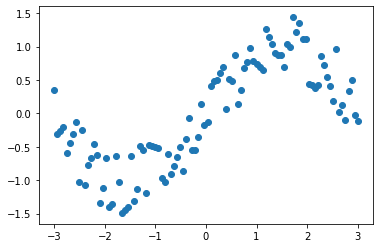

In [28]:
# let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1,1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, .5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [29]:
#tf.placeholders:
# for the input and output of the network.
# placeholders are variables which we need to fill in when we are ready to compute the graph
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [30]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
y_pred = tf.add(tf.multiply(X,W), b)

In [31]:
# loss function will measure the distance between our observations and predictions and average over them
cost = tf.reduce_sum(tf.pow(y_pred -Y, 2)) / (n_observations - 1)

In [32]:
# using gradient descent to optimize W, b performs a single step in the negative  gradient
learning_rate = 0.01
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
# we create a session
n_epochs = 1000
with tf.Session() as sess:
    # here we tell tensorflow that  we want to initialize all the variables in the graph so we can use them
    sess.run(tf.global_variables_initializer())
    
    #fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x,y) in zip(xs, ys):
            sess.run(optimizer,feed_dict={X:x, Y:y})
        
        training_cost = sess.run(cost,
                                 feed_dict={X:xs, Y:ys})
        
        print(training_cost)
        
        if epoch_i % 20 == 0:
            ax.plot(xs,
                    y_pred.eval(feed_dict ={X:xs},
                                session = sess),
                    'k',
                    alpha = epoch_i/n_epochs)
            fig.show()
            plt.draw()
        
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
    
#ax.set_ylim([-3, 3])
fig.show()
plt.waitforbuttonpress()